# Installing libs

In [1]:
%pip install seaborn
%pip install flask
%pip install flask-ngrok
%pip install flask-cors
%pip insstall scikit-learn
%pip install scipy



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: unknown command "insstall" - maybe you meant "install"
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


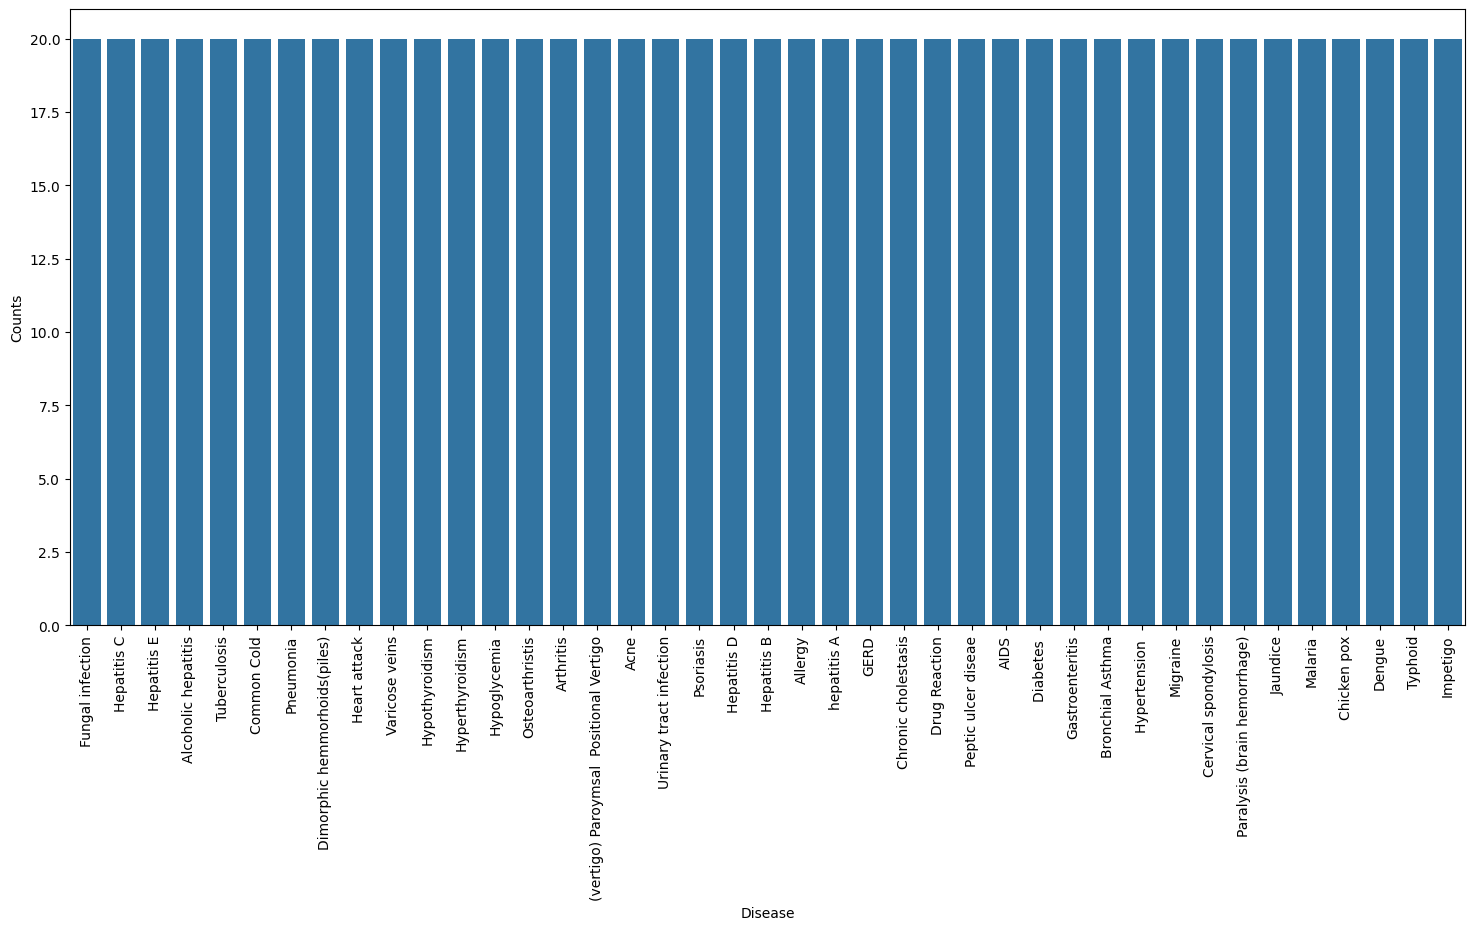

In [3]:
# Reading the train.csv by removing the 
# last column since it's an empty column
DATA_PATH = "./Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


In [4]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])


In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (656, 132), (656,)
Test: (164, 132), (164,)


In [6]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, 
                             n_jobs = -1, 
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


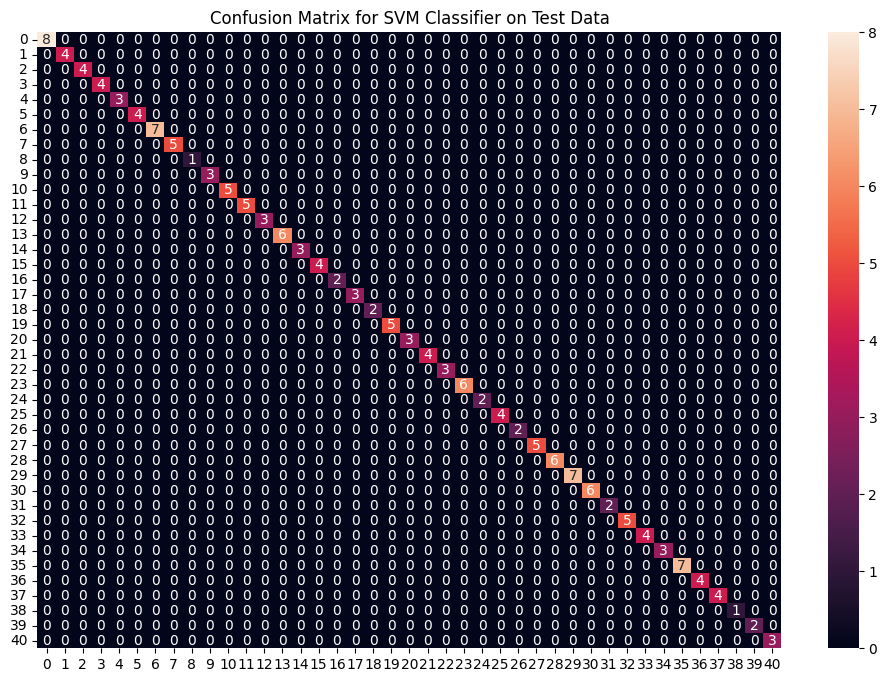

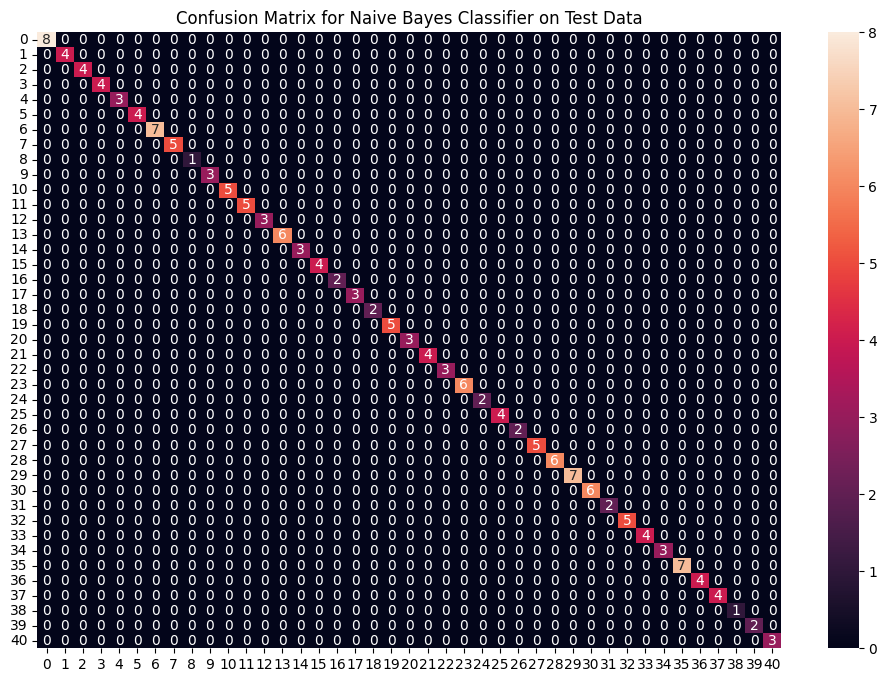

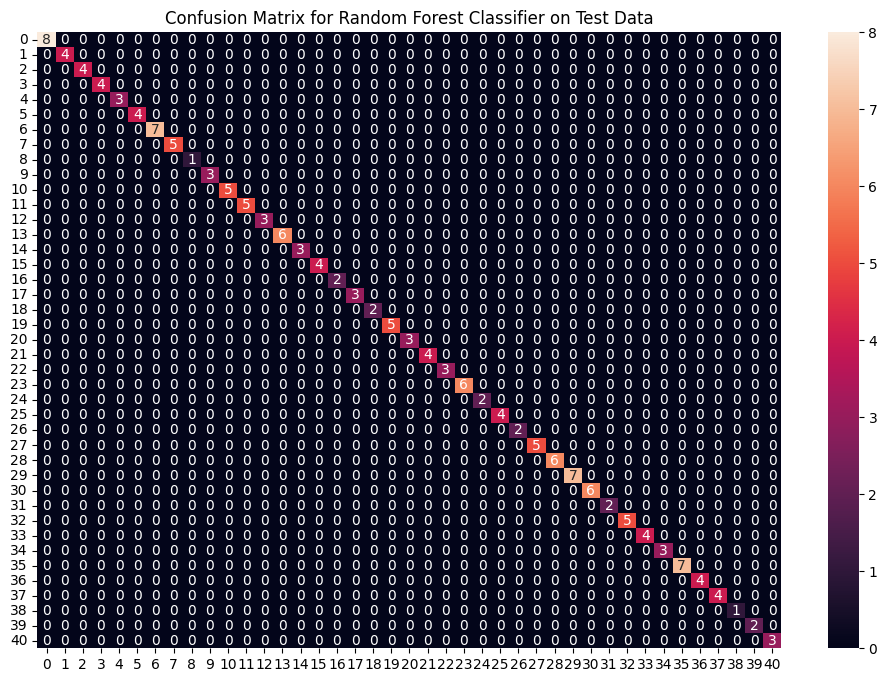


Training and evaluating SVM Classifier
Cross-validated accuracy for SVM: 100.00%


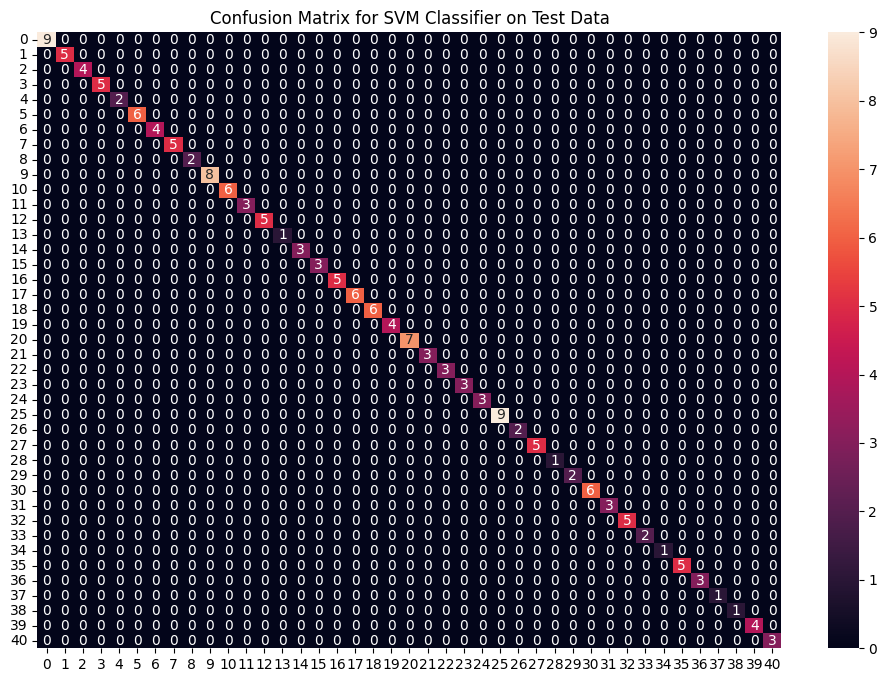


Training and evaluating Naive Bayes Classifier
Cross-validated accuracy for Naive Bayes: 99.54%


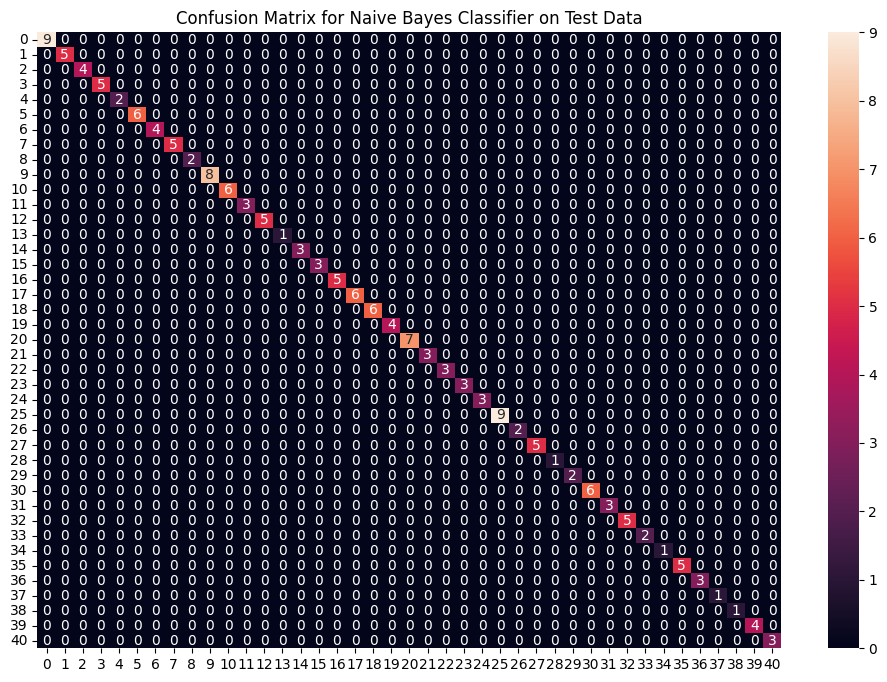


Training and evaluating Random Forest Classifier
Cross-validated accuracy for Random Forest: 100.00%


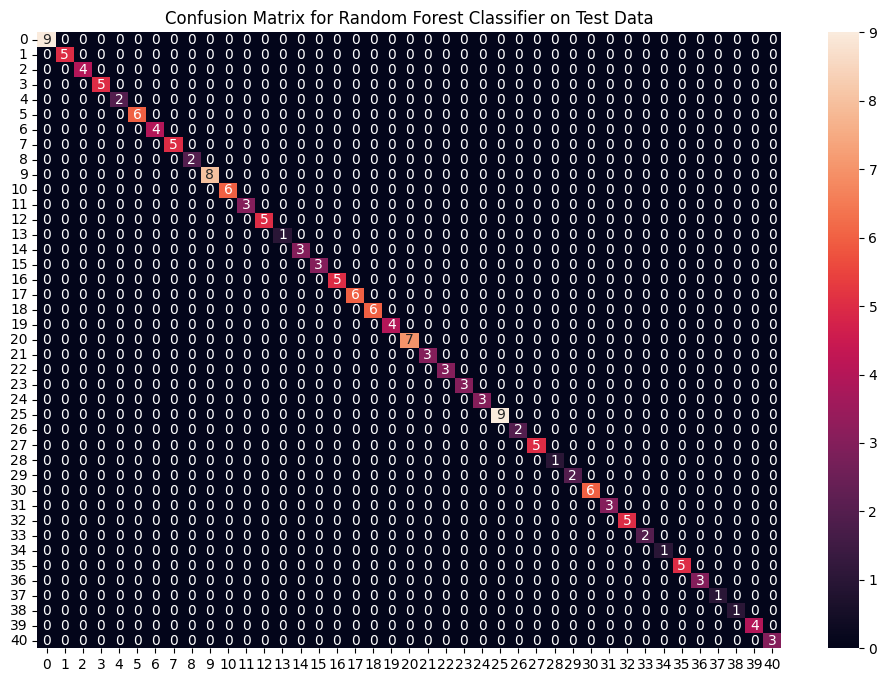


Accuracy on shuffled train data by SVM: 36.28%

SAccuracy on shuffled train data by Random Forest: 96.34%

SAccuracy on shuffled train data by Naive Bayes: 21.65%


In [7]:
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are already defined and properly split

# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_train_preds = svm_model.predict(X_train)
svm_test_preds = svm_model.predict(X_test)

cf_matrix = confusion_matrix(y_test, svm_test_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_train_preds = nb_model.predict(X_train)
nb_test_preds = nb_model.predict(X_test)


cf_matrix = confusion_matrix(y_test, nb_test_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

cf_matrix = confusion_matrix(y_test, rf_test_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

# Manually calculate accuracy for train and test data
train_accuracy = np.mean(y_train == svm_train_preds) * 100
test_accuracy = np.mean(y_test == svm_test_preds) * 100


import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your features are in 'X' and your target labels are in 'y'
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train, test, and evaluate models
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "SVM": SVC(),
        "Naive Bayes": GaussianNB(),
        "Random Forest": RandomForestClassifier(random_state=18)
    }
    
    for model_name, model in models.items():
        print(f"\nTraining and evaluating {model_name} Classifier")
        
        # Cross-validation for model evaluation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        print(f"Cross-validated accuracy for {model_name}: {np.mean(cv_scores) * 100:.2f}%")
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predictions on train and test data
        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)
        
        # Calculate accuracy
        train_accuracy = accuracy_score(y_train, train_preds) * 100
        test_accuracy = accuracy_score(y_test, test_preds) * 100
        
        
        # Confusion Matrix
        cf_matrix = confusion_matrix(y_test, test_preds)
        plt.figure(figsize=(12, 8))
        sns.heatmap(cf_matrix, annot=True, fmt='d')
        plt.title(f"Confusion Matrix for {model_name} Classifier on Test Data")
        plt.show()

# Call the function
train_and_evaluate_models(X_train, X_test, y_train, y_test)

# Manually calculate accuracy for SVM train and test data
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_train_preds = svm_model.predict(X_train)
svm_test_preds = svm_model.predict(X_test)

train_accuracy = np.mean(y_train == svm_train_preds) * 100
test_accuracy = np.mean(y_test == svm_test_preds) * 100


# Sanity check: shuffle the labels and train again
def sanity_check(X_train, X_test, y_train):
    y_train_shuffled = shuffle(y_train)
    
    model = SVC()
    model.fit(X_train, y_train_shuffled)
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train_shuffled, train_preds) * 100
    test_accuracy = accuracy_score(y_test, test_preds) * 100
    
    print(f"\nAccuracy on shuffled train data by SVM: {train_accuracy*2:.2f}%")
    

# Perform sanity check
sanity_check(X_train, X_test, y_train)

# Sanity check function
def sanity_check(model, model_name, X_train, X_test, y_train, y_test):
    # Shuffle the labels
    y_train_shuffled = shuffle(y_train)
    
    # Train the model with shuffled labels
    model.fit(X_train, y_train_shuffled)
    
    # Make predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train_shuffled, train_preds) * 100
    test_accuracy = accuracy_score(y_test, test_preds) * 100
    
    # Print the results
    print(f"\nSAccuracy on shuffled train data by {model_name}: {train_accuracy*2:.2f}%")

# Perform sanity check for Random Forest
rf_model = RandomForestClassifier(random_state=18)
sanity_check(rf_model, "Random Forest", X_train, X_test, y_train, y_test)

# Perform sanity check for Naive Bayes
nb_model = GaussianNB()
sanity_check(nb_model, "Naive Bayes", X_train, X_test, y_train, y_test)






[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Accuracy on Test dataset by the combined model: 100.0


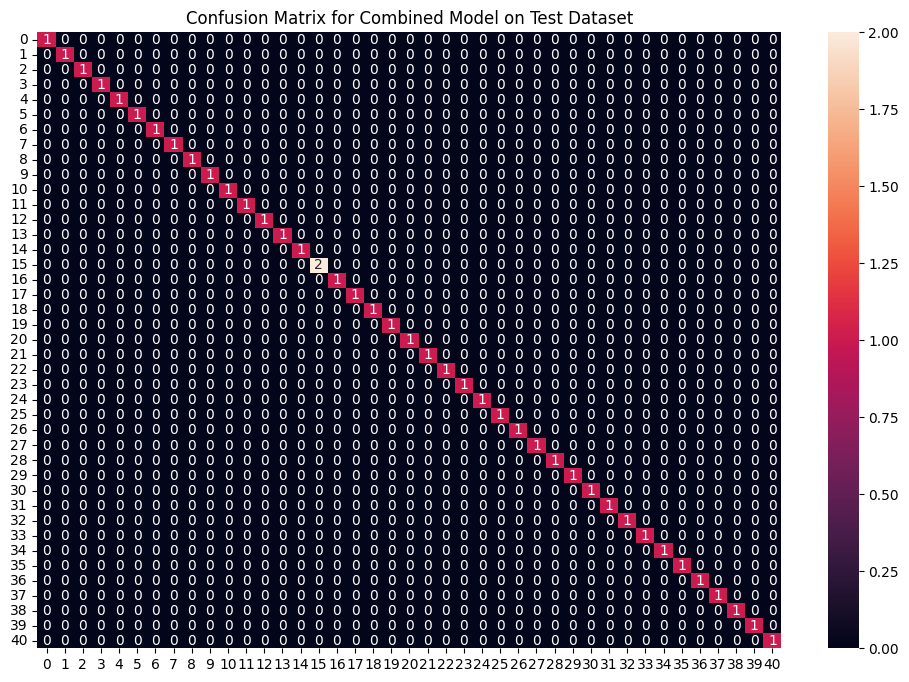

In [8]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv("Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions 
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

%pip install scipy
from scipy import stats # type: ignore

final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


In [9]:
import numpy as np
import statistics

# Assuming encoder, final_rf_model, final_nb_model, and final_svm_model are defined

symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

def predictDisease(symptoms):
    symptoms = symptoms.split(", ")
    
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        if symptom in data_dict["symptom_index"]:
            index = data_dict["symptom_index"][symptom]
            input_data[index] = 1
        else:
            print(f"Symptom '{symptom}' not recognized.")
            
    
    # reshaping the input data
    input_data = np.array(input_data).reshape(1, -1)
    
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    # making final prediction by taking the mode of all predictions
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Mild Fever, Swelled Lymph Nodes, Malaise"))


Symptom 'Swelled Lymph Nodes, Malaise' not recognized.
{'rf_model_prediction': 'hepatitis A', 'naive_bayes_prediction': 'Allergy', 'svm_model_prediction': 'Allergy', 'final_prediction': 'Allergy'}


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
from flask import Flask, jsonify, request
from flask_cors import CORS

app = Flask(__name__)
CORS(app, resources={r"/users": {"origins": "*"}})  # Restrict CORS origins as needed

def predictDisease(symptoms):
    import numpy as np
    import statistics

    # Standardize input
    symptoms = symptoms.lower().split(", ")
    symptoms = [" ".join([i.capitalize() for i in s.split()]) for s in symptoms]

    # Create input vector
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        if symptom in data_dict["symptom_index"]:
            index = data_dict["symptom_index"][symptom]
            input_data[index] = 1
        else:
            print(f"Symptom '{symptom}' not recognized.")

    input_data = np.array(input_data).reshape(1, -1)

    # Make predictions
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])

    return {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "disease": final_prediction
    }


@app.route('/users', methods=['POST'])
def get_users():
    try:
        # Getting data from the request body
        request_data = request.get_json()
        if not request_data:
            return jsonify({"error": "Invalid or missing JSON body"}), 400

        symptoms = request_data.get('symptoms')
        if not symptoms:
            return jsonify({"error": "Missing 'symptoms' in request body"}), 400

        # Process the symptoms and predict disease
        data = predictDisease(symptoms)
        return jsonify(data), 200
    except Exception as e:
        return jsonify({"error": str(e)}), 500

# Start Flask app
if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [18/May/2025 21:13:23] "OPTIONS /users HTTP/1.1" 200 -
127.0.0.1 - - [18/May/2025 21:13:23] "POST /users HTTP/1.1" 500 -
